#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OrdinalEncoder
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#### Import data

In [2]:
train = pd.read_csv('../datasets/train.csv', keep_default_na=False, na_values='')
test = pd.read_csv('../datasets/test.csv', keep_default_na=False, na_values='')

#### EDA

In [3]:
#changing settings to see all columns
pd.set_option('max_columns', 80)
pd.set_option('max_rows', 80)
train.shape #.head(20)

(2051, 81)

In [4]:
# Changing columns to snake case for better readability
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [5]:
train.shape, test.shape

((2051, 81), (878, 80))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
# Descriptive stats
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
pd.options.display.max_rows = 82
train.isna().sum()
[col for col in train.columns if train[col].isnull().any()]
train.loc[:, train.isnull().any()].isna().sum()

lot_frontage      330
mas_vnr_type       22
mas_vnr_area       22
bsmt_qual           1
bsmt_cond           1
bsmt_exposure       4
bsmtfin_type_1      1
bsmtfin_sf_1        1
bsmtfin_type_2      2
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_yr_blt     114
garage_finish       1
garage_cars         1
garage_area         1
garage_qual         1
garage_cond         1
dtype: int64

In [9]:
# Creating separate lists for numeric and categorical columns
num_cols = list(train.describe(exclude='object').columns)
num_cols_test = list(test.describe(exclude='object').columns)

In [10]:
num_cols

['id',
 'pid',
 'ms_subclass',
 'lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'saleprice']

In [11]:
cat_cols =  list(train.describe(include='object').columns)
cat_cols_test = list(test.describe(include='object').columns)
cat_cols

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type']

In [12]:
train[num_cols]

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,520.0,0,276,0,0,0,0,0,1,2008,298751
2047,785,905377130,30,NaN,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,539.0,158,0,0,0,0,0,0,3,2009,82500
2048,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,342.0,0,0,0,0,0,0,0,3,2009,177000
2049,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,295.0,1200.0,1200,0,0,1200,1.0,0.0,1,0,3,1,6,2,1956.0,1.0,294.0,0,189,140,0,0,0,0,11,2009,144000


### Encoding some of the categorical values

In [13]:
to_ordinal = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0, '':0}

In [14]:
train['exter_qual'] = train['exter_qual'].replace(to_ordinal)
train['bsmt_qual'] = train['bsmt_qual'].replace(to_ordinal)
train['bsmt_cond'] = train['bsmt_cond'].replace(to_ordinal)
train['bsmt_exposure'] = train['bsmt_exposure'].replace(to_ordinal)
train['heating_qc'] = train['heating_qc'].replace(to_ordinal)
train['kitchen_qual'] = train['kitchen_qual'].replace(to_ordinal)
train['bsmt_cond'] = train['bsmt_cond'].replace(to_ordinal)
train['fireplace_qu'] = train['fireplace_qu'].replace(to_ordinal)
train['garage_qual'] = train['garage_qual'].replace(to_ordinal)
train['garage_cond'] = train['garage_cond'].replace(to_ordinal)
train['pool_qc'] = train['pool_qc'].replace(to_ordinal)

In [15]:
test['exter_qual'] = test['exter_qual'].replace(to_ordinal)
test['bsmt_qual'] = test['bsmt_qual'].replace(to_ordinal)
test['bsmt_cond'] = test['bsmt_cond'].replace(to_ordinal)
test['bsmt_exposure'] = test['bsmt_exposure'].replace(to_ordinal)
test['heating_qc'] = test['heating_qc'].replace(to_ordinal)
test['kitchen_qual'] = test['kitchen_qual'].replace(to_ordinal)
test['bsmt_cond'] = test['bsmt_cond'].replace(to_ordinal)
test['fireplace_qu'] = test['fireplace_qu'].replace(to_ordinal)
test['garage_qual'] = test['garage_qual'].replace(to_ordinal)
test['garage_cond'] = test['garage_cond'].replace(to_ordinal)
test['pool_qc'] = test['pool_qc'].replace(to_ordinal)

In [16]:
bsmt_exp_to_ordinal = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1, 'NA': 0, '':0}
train['bsmt_exposure'] = train['bsmt_exposure'].replace(bsmt_exp_to_ordinal)
test['bsmt_exposure'] = test['bsmt_exposure'].replace(bsmt_exp_to_ordinal)

In [17]:
bsmt_fin_to_ordinal = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA':0}
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].replace(bsmt_fin_to_ordinal)
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].replace(bsmt_fin_to_ordinal)

train['bsmtfin_type_2'] = train['bsmtfin_type_2'].replace(bsmt_fin_to_ordinal)
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].replace(bsmt_fin_to_ordinal)

In [18]:
funct_to_ordinal = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal':0}
train['functional'] = train['functional'].replace(funct_to_ordinal)
test['functional'] = test['functional'].replace(funct_to_ordinal)

In [19]:
gar_finish_to_ordinal = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA':0}
train['garage_finish'] = train['garage_finish'].replace(gar_finish_to_ordinal)
test['garage_finish'] = test['garage_finish'].replace(gar_finish_to_ordinal)

In [20]:
paved_drive_to_ordinal = {'Y': 2, 'P': 1, 'N': 0}
train['paved_drive'] = train['paved_drive'].replace(paved_drive_to_ordinal)
test['paved_drive'] = test['paved_drive'].replace(paved_drive_to_ordinal)

In [21]:
fence_to_ordinal = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
train['fence'] = train['fence'].replace(fence_to_ordinal)
test['fence'] = test['fence'].replace(fence_to_ordinal)

In [22]:
utilities_to_ordinal = {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}
train['utilities'] = train['utilities'].replace(utilities_to_ordinal)
test['utilities'] = test['utilities'].replace(utilities_to_ordinal)

In [23]:
#redefining to include these converted columns
num_cols = list(train.describe(exclude='object').columns)
num_cols_test = list(test.describe(exclude='object').columns)
train[num_cols]

,id,pid,ms_subclass,lot_frontage,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,NaN,13517,3,6,8,1976,2005,289.0,4,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,1976.0,2.0,2.0,475.0,3.0,3.0,2,0,44,0,0,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,3,7,5,1996,1997,132.0,4,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,1997.0,2.0,2.0,559.0,3.0,3.0,2,0,74,0,0,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,3,5,7,1953,2007,0.0,3,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,3,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,1953.0,1.0,1.0,246.0,3.0,3.0,2,0,52,0,0,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,3,5,5,2006,2007,0.0,3,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,2007.0,3.0,2.0,400.0,3.0,3.0,2,100,0,0,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,3,6,8,1900,1993,0.0,3,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,3,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,1957.0,1.0,2.0,484.0,3.0,3.0,0,0,59,0,0,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,79.0,11449,3,8,5,2007,2007,0.0,4,4.0,3.0,3.0,6.0,1011.0,1.0,0.0,873.0,1884.0,5,1728,0,0,1728,1.0,0.0,2,0,3,1,4,7,7,1,4,2007.0,3.0,2.0,520.0,3.0,3.0,2,0,276,0,0,0,0,0,0,0,1,2008,298751
2047,785,905377130,30,NaN,12342,3,4,5,1940,1950,0.0,3,3.0,3.0,1.0,4.0,262.0,1.0,0.0,599.0,861.0,5,861,0,0,861,0.0,0.0,1,0,1,1,3,4,7,0,0,1961.0,1.0,2.0,539.0,3.0,3.0,2,158,0,0,0,0,0,0,0,0,3,2009,82500
2048,916,909253010,50,57.0,7558,3,6,6,1928,1950,0.0,3,3.0,3.0,1.0,1.0,0.0,1.0,0.0,896.0,896.0,4,1172,741,0,1913,0.0,0.0,1,1,3,1,3,9,7,1,3,1929.0,1.0,2.0,342.0,2.0,2.0,2,0,0,0,0,0,0,0,0,0,3,2009,177000
2049,639,535179160,20,80.0,10400,3,4,5,1956,1956,0.0,3,3.0,3.0,1.0,3.0,155.0,2.0,750.0,295.0,1200.0,3,1200,0,0,1200,1.0,0.0,1,0,3,1,3,6,7,2,4,1956.0,1.0,1.0,294.0,3.0,3.0,2,0,189,140,0,0,0,0,0,0,11,2009,144000


### Taking care of missing numeric values

In [24]:
train[num_cols].isna().sum()

id                   0
pid                  0
ms_subclass          0
lot_frontage       330
lot_area             0
utilities            0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
mas_vnr_area        22
exter_qual           0
bsmt_qual            1
bsmt_cond            1
bsmt_exposure        4
bsmtfin_type_1       1
bsmtfin_sf_1         1
bsmtfin_type_2       2
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
heating_qc           0
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       2
bsmt_half_bath       2
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
kitchen_qual         0
totrms_abvgrd        0
functional           0
fireplaces           0
fireplace_qu         0
garage_yr_blt      114
garage_finish        1
garage_cars          1
garage_area          1
garage_qual          1
garage_cond          1
paved_drive

#### Imputing lot_frontage based on training set mean

In [25]:
lot_frontage_mean = train['lot_frontage'].mean()
train['lot_frontage'].fillna(lot_frontage_mean, inplace=True)
test['lot_frontage'].fillna(lot_frontage_mean, inplace=True)

#### There are a lot of missing values for garage_yr_blt

In [26]:
train[train['garage_yr_blt'].isna()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,...,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,911103060,190,C (all),75.0,8250,Pave,NA,Reg,Lvl,3,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,Gd,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,957.0,957.0,...,2,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,3,9,7,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,133,0,0,0,0,0,NA,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NA,Reg,Lvl,3,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,TA,CBlock,3.0,3.0,1.0,6.0,176.0,1.0,0.0,370.0,546.0,...,5,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,7,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,2,200,26,0,0,0,0,0,0,NA,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NA,Reg,Lvl,3,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,TA,PConc,4.0,3.0,1.0,5.0,206.0,1.0,0.0,914.0,1120.0,...,5,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,3,6,7,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,2,0,30,0,0,0,0,0,0,NA,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NA,Reg,Lvl,3,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,Gd,BrkTil,3.0,1.0,1.0,1.0,0.0,1.0,0.0,936.0,936.0,...,5,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,3,6,7,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,176,0,0,0,0,NA,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NA,IR1,Lvl,3,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,TA,BrkTil,3.0,3.0,2.0,5.0,348.0,1.0,0.0,180.0,528.0,...,5,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,3,5,7,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,144,0,0,0,0,0,NA,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NA,Reg,Low,3,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,3,TA,CBlock,3.0,3.0,3.0,1.0,0.0,1.0,0.0,912.0,912.0,...,3,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,3,8,7,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,2,128,0,0,0,0,0,0,0,NA,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NA,Reg,Lvl,3,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,TA,Slab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,3,5,4,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,23,0,0,0,0,0,NA,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NA,Reg,Lvl,3,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,3,TA,CBlock,3.0,2.0,1.0,1.0,0.0,1.0,0.0,1556.0,1556.0,...,3,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,3,8,7,0,0,NA,NaN,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,NA,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,NA,Reg,Lvl,3,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,

In [27]:
corr = train.corr()
corr['garage_yr_blt'].sort_values(ascending=False).head()

garage_yr_blt     1.000000
year_built        0.825316
year_remod/add    0.674024
exter_qual        0.608118
bsmt_qual         0.585670
Name: garage_yr_blt, dtype: float64

#### Houses with NA for garage type have no garage, so there is no value for garage year built.
#### There is a high correlation between this and the year the house was built, so we will delete this column

In [28]:
train.drop(columns='garage_yr_blt', inplace=True)
test.drop(columns='garage_yr_blt', inplace=True)

#### We will assume that the garage and basement values should be 0 because there is no garage or basement.  For masonry veneer area, we can also assume 0 because there is no masonry veneer.

In [29]:
# redefining to exclude garage_yr_blt
num_cols = list(train.describe(exclude='object').columns)
num_cols = list(test.describe(exclude='object').columns)

In [30]:
train[['mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 
       'bsmt_full_bath', 'bsmt_half_bath', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond']] = train[['mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
       'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'garage_finish', 'garage_cars', 'garage_area', 
       'garage_qual', 'garage_cond']].fillna(0)

test[['mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 
       'bsmt_full_bath', 'bsmt_half_bath', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond']] = test[['mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
       'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'garage_finish', 'garage_cars', 'garage_area', 
       'garage_qual', 'garage_cond']].fillna(0)
#test[num_cols].isna().sum()
train[num_cols].isna().sum()

id                 0
pid                0
ms_subclass        0
lot_frontage       0
lot_area           0
utilities          0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
exter_qual         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating_qc         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
kitchen_qual       0
totrms_abvgrd      0
functional         0
fireplaces         0
fireplace_qu       0
garage_finish      0
garage_cars        0
garage_area        0
garage_qual        0
garage_cond        0
paved_drive        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch 

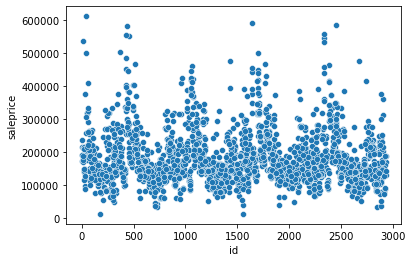

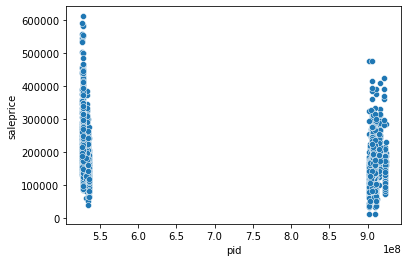

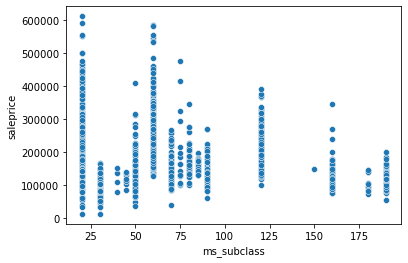

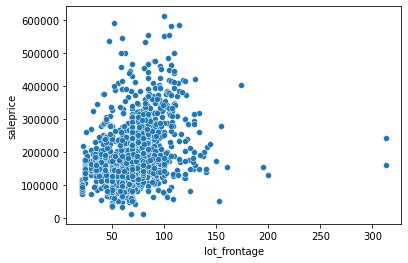

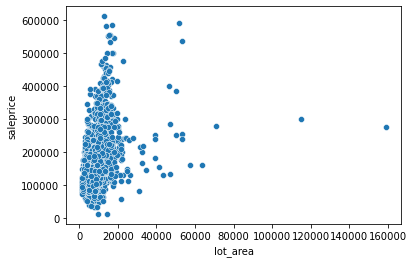

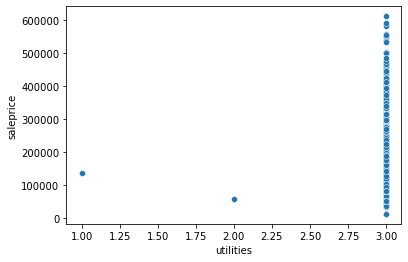

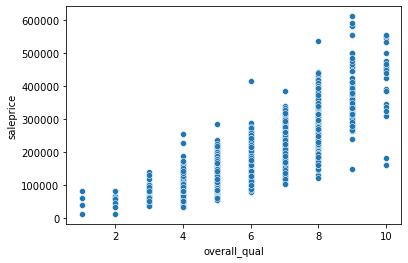

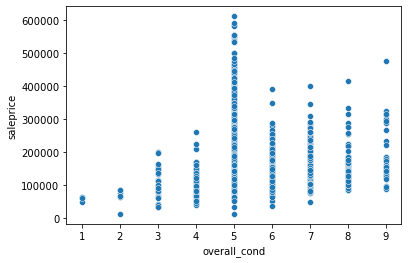

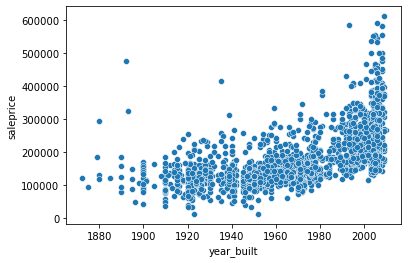

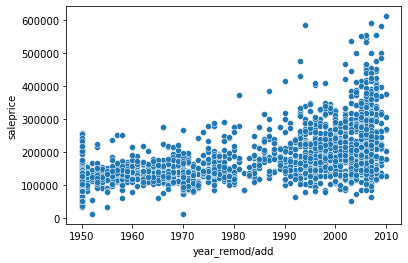

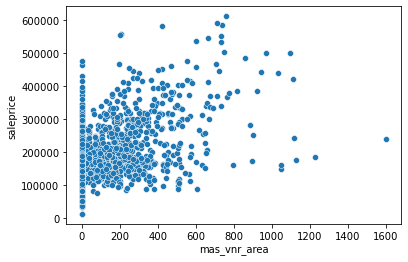

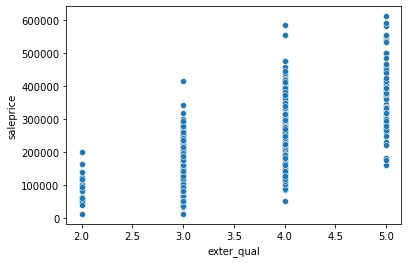

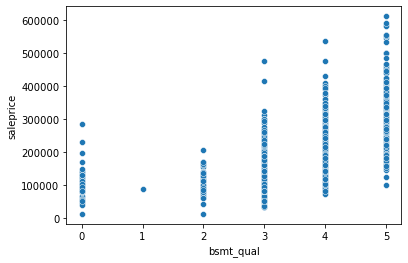

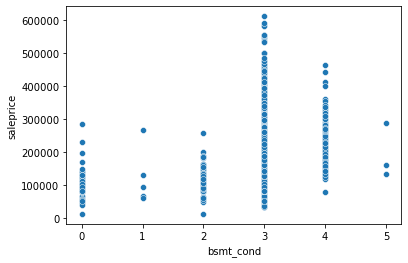

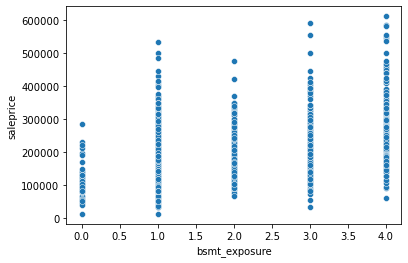

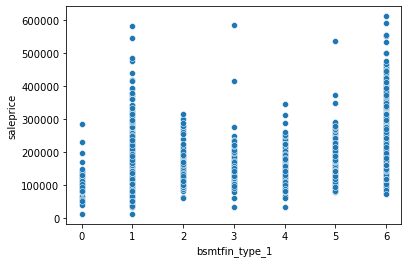

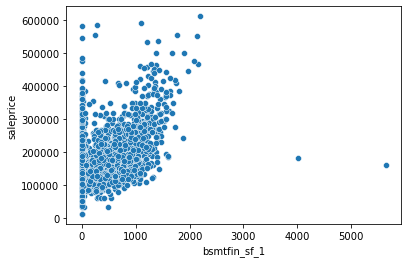

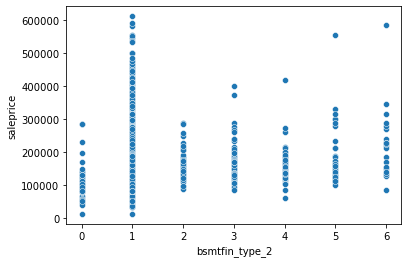

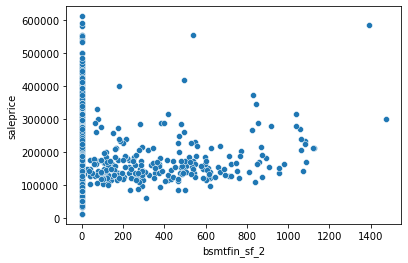

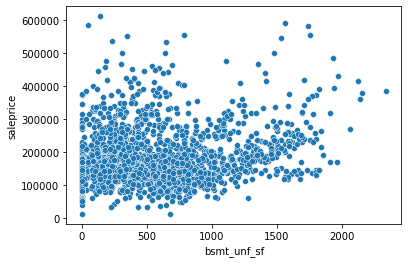

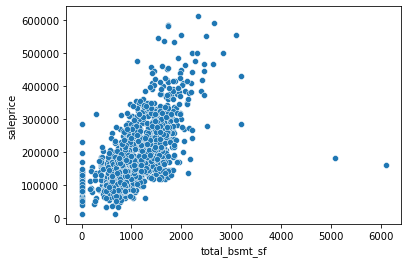

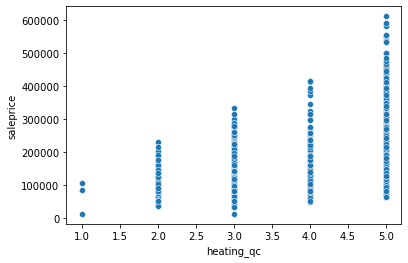

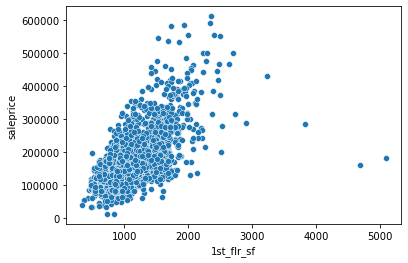

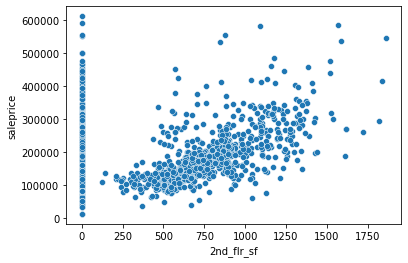

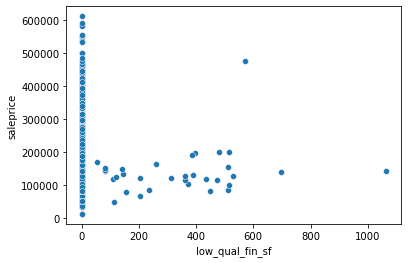

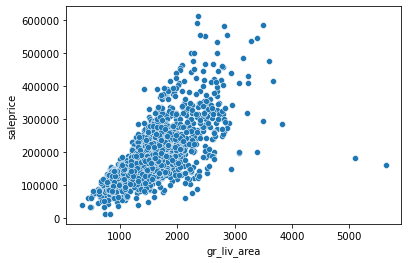

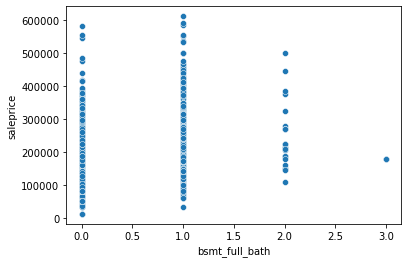

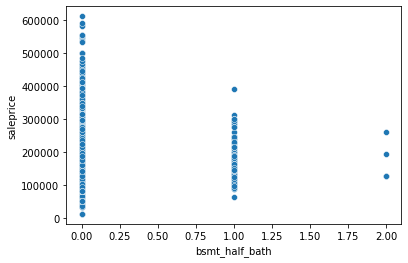

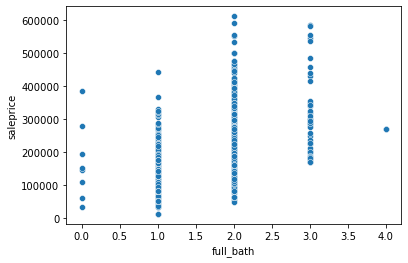

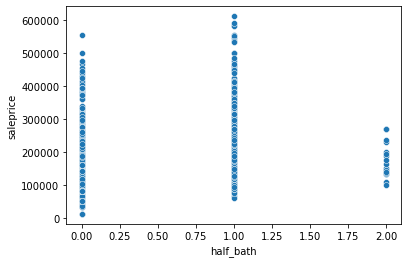

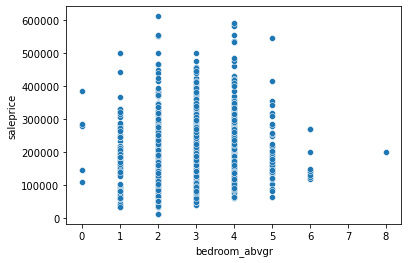

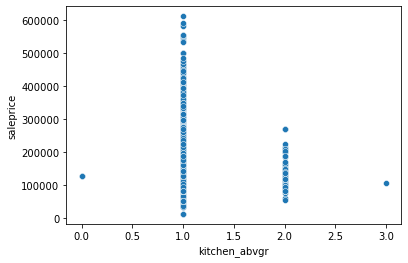

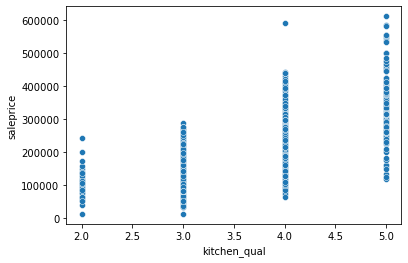

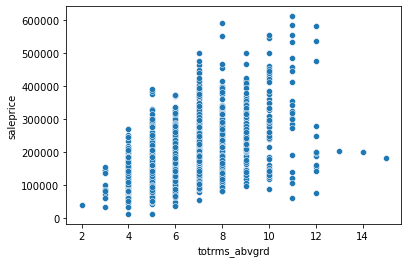

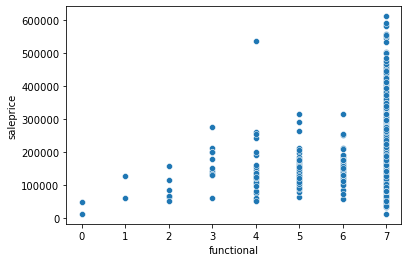

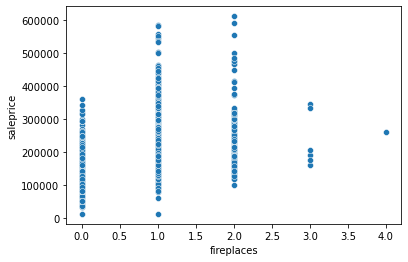

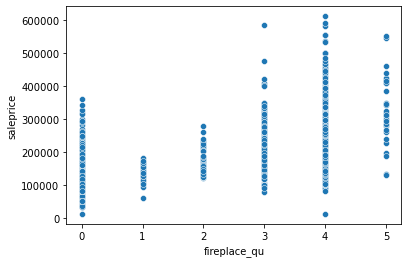

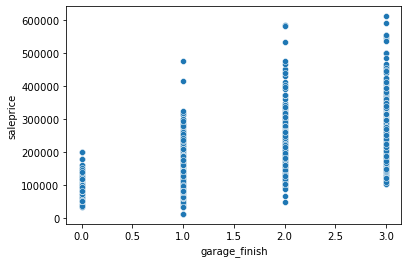

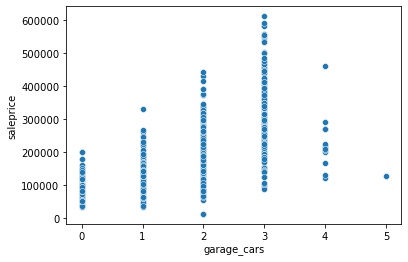

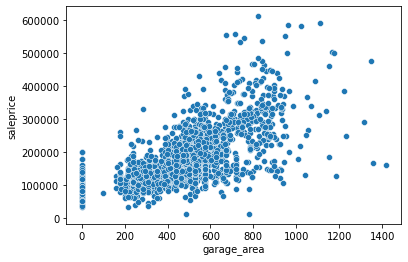

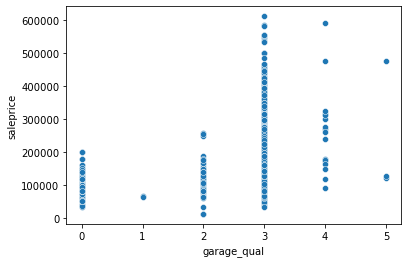

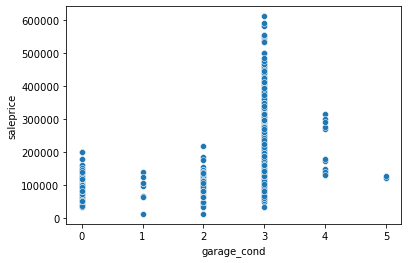

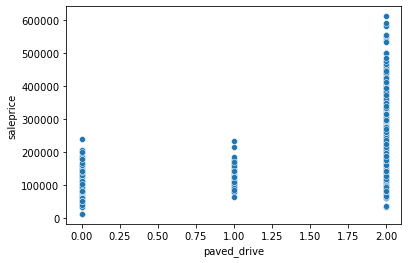

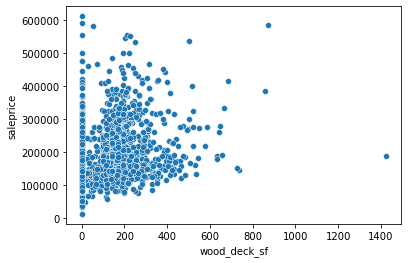

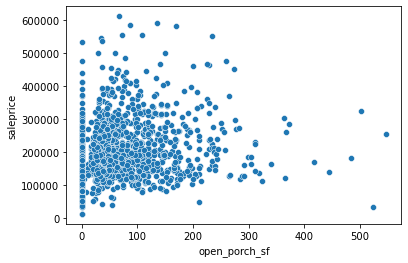

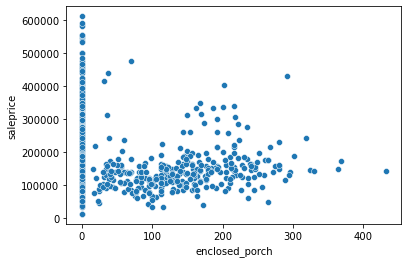

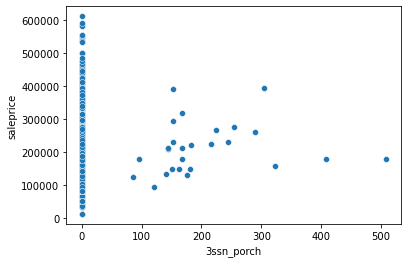

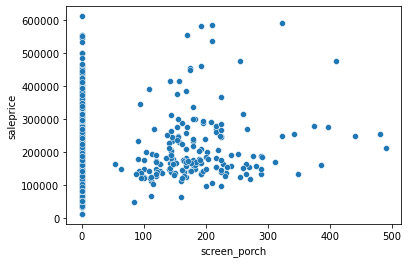

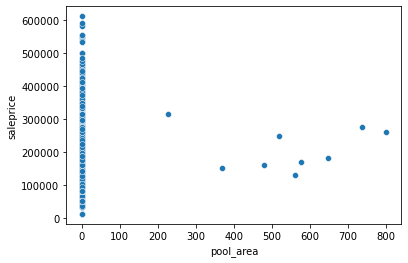

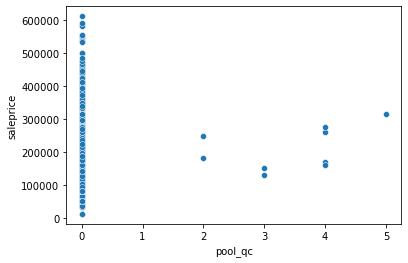

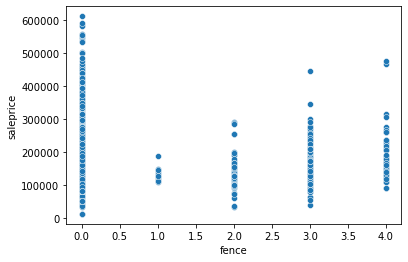

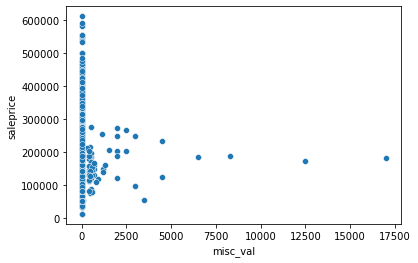

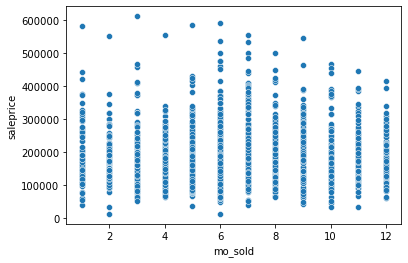

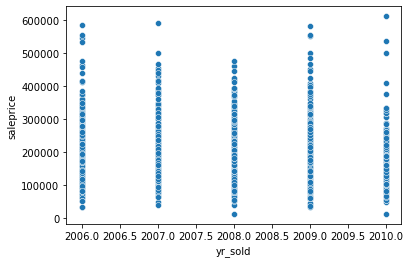

In [31]:
for col in list(num_cols):
    sns.scatterplot(data=train, x=col, y='saleprice')
    plt.show()

### Categorical Data

In [32]:
cat_cols =  list(train.describe(include='object').columns)
cat_cols_test = list(test.describe(include='object').columns)
cat_cols

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_cond',
 'foundation',
 'heating',
 'central_air',
 'electrical',
 'garage_type',
 'misc_feature',
 'sale_type']

In [33]:
train[cat_cols].isna().sum()

ms_zoning        0
street           0
alley            0
lot_shape        0
land_contour     0
lot_config       0
land_slope       0
neighborhood     0
condition_1      0
condition_2      0
bldg_type        0
house_style      0
roof_style       0
roof_matl        0
exterior_1st     0
exterior_2nd     0
mas_vnr_type    22
exter_cond       0
foundation       0
heating          0
central_air      0
electrical       0
garage_type      0
misc_feature     0
sale_type        0
dtype: int64

#### Filling missing values

In [34]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

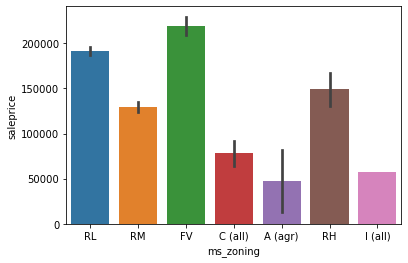

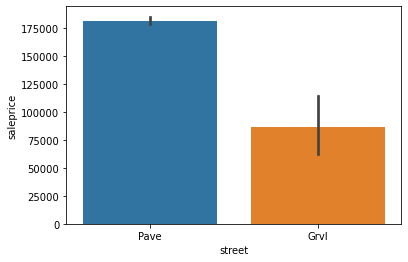

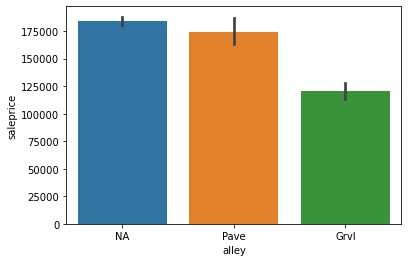

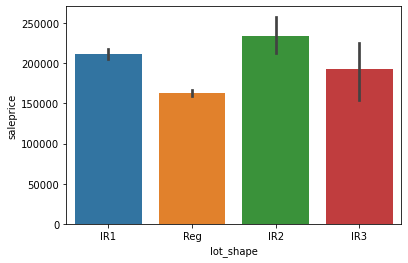

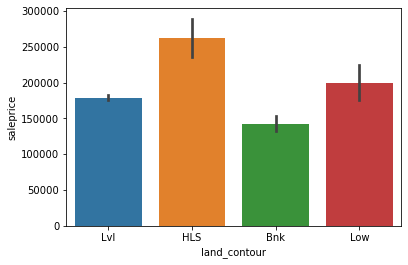

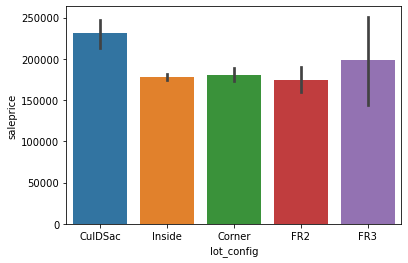

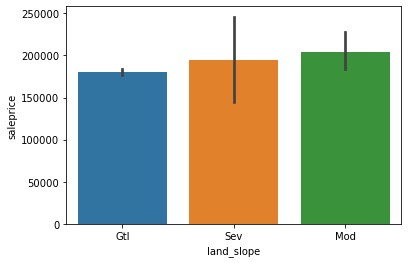

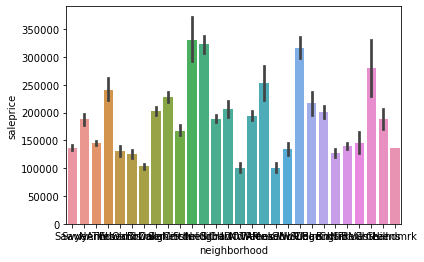

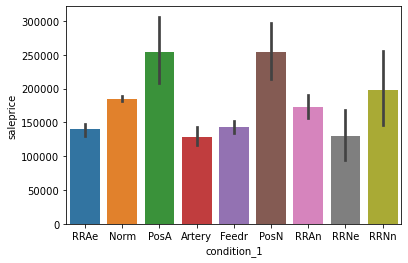

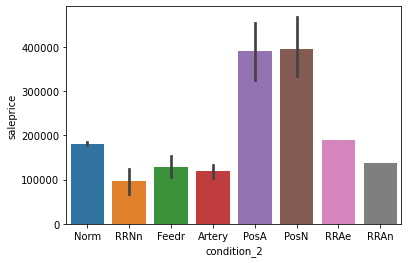

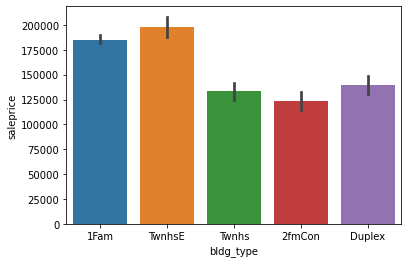

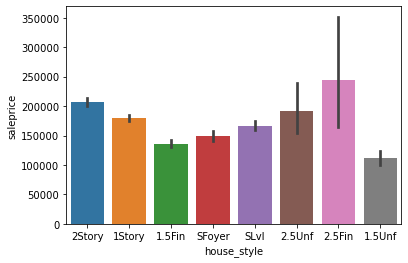

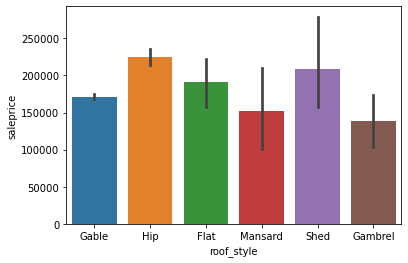

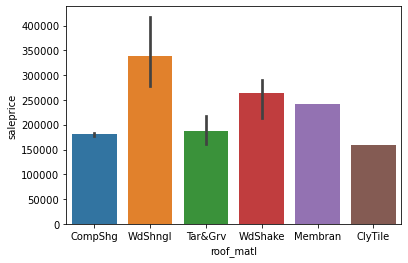

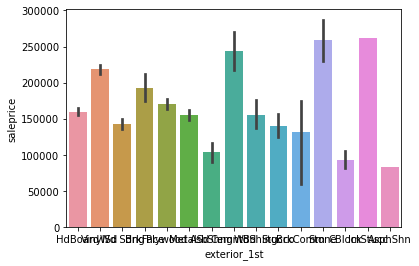

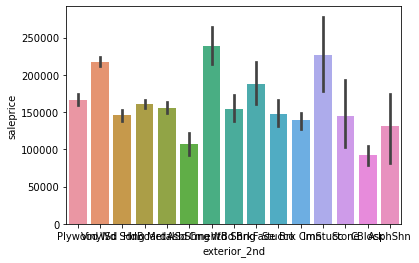

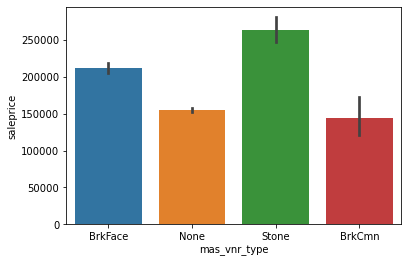

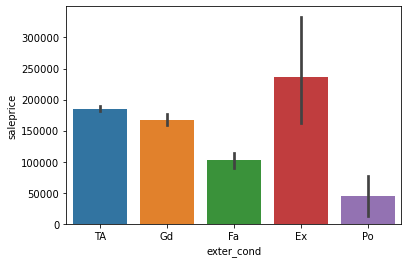

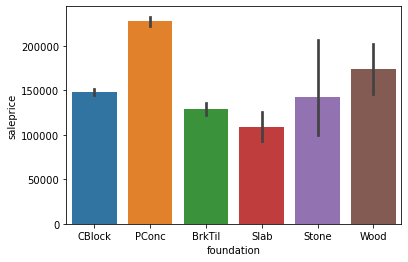

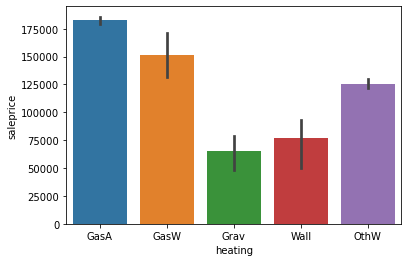

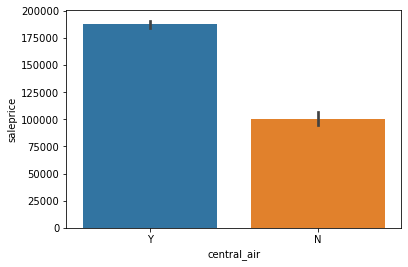

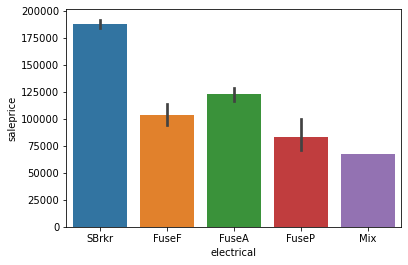

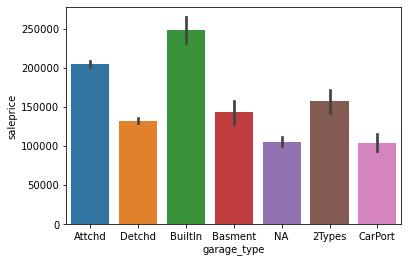

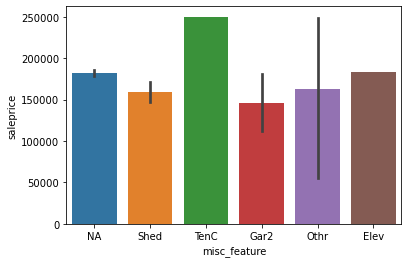

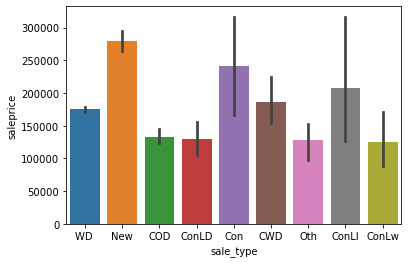

In [35]:
for col in list(cat_cols):
    sns.barplot(data=train, x=col, y='saleprice')
    plt.show()

#### OneHotEncode categorical features

In [36]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)  #

In [37]:
# Removing salesprice column so it can be fit on test set
X_train = train.drop(columns='saleprice')

In [38]:
smart_encoder = make_column_transformer(
    (ohe, ['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 
           'condition_2', 'bldg_type', 'house_style', 'roof_matl', 'roof_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_cond', 
           'foundation', 'heating', 'central_air', 'electrical', 'garage_type', 'misc_feature', 'sale_type']),
    remainder='passthrough',
    verbose_feature_names_out = False
)

In [39]:
smart_encoder.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['ms_zoning', 'street', 'alley', 'lot_shape',
                                  'land_contour', 'lot_config', 'land_slope',
                                  'neighborhood', 'condition_1', 'condition_2',
                                  'bldg_type', 'house_style', 'roof_matl',
                                  'roof_style', 'exterior_1st', 'exterior_2nd',
                                  'mas_vnr_type', 'exter_cond', 'foundation',
                                  'heating', 'central_air', 'electrical',
                                  'garage_type', 'misc_feature',
                                  'sale_type'])],
                  verbose_feature_names_out=False

In [40]:
X_train_encoded = smart_encoder.transform(X_train)
X_train_encoded

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.000e+00,
        2.010e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 4.000e+00,
        2.009e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        2.010e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.000e+00,
        2.009e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.100e+01,
        2.009e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e+00,
        2.010e+03]])

In [41]:
X_train_encoded = pd.DataFrame(X_train_encoded, columns=smart_encoder.get_feature_names_out())
X_train_encoded.head()

,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Grvl,alley_NA,alley_Pave,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,...,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,533.0,1.0,0.0,192.0,725.0,5.0,725.0,754.0,0.0,1479.0,0.0,0.0,2.0,1.0,3.0,1.0,4.0,6.0,7.0,0.0,0.0,2.0,2.0,475.0,3.0,3.0,2.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,637.0,1.0,0.0,276.0,913.0,5.0,913.0,1209.0,0.0,2122.0,1.0,0.0,2.0,1.0,4.0,1.0,4.0,8.0,7.0,1.0,3.0,2.0,2.0,559.0,3.0,3.0,2.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,3.0,1057.0,0.0,0.0,1057.0,1.0,0.0,1.0,0.0,3.0,1.0,4.0,5.0,7.0,0.0,0.0,1.0,1.0,246.0,3.0,3.0,2.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,384.0,384.0,4.0,744.0,700.0,0.0,1444.0,0.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,7.0,0.0,0.0,3.0,2.0,400.0,3.0,3.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,676.0,676.0,3.0,831.0,614.0,0.0,1445.0,0.0,0.0,2.0,0.0,3.0,1.0,3.0,6.0,7.0,0.0,0.0,1.0,2.0,484.0,3.0,3.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0


In [42]:
test_encoded = smart_encoder.transform(test)
test_encoded = pd.DataFrame(test_encoded, columns=smart_encoder.get_feature_names_out())
test_encoded

,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Grvl,alley_NA,alley_Pave,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,...,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1020.0,1020.0,4.0,908.0,1020.0,0.0,1928.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,9.0,7.0,0.0,0.0,1.0,1.0,440.0,1.0,1.0,2.0,0.0,60.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1967.0,1967.0,3.0,1967.0,0.0,0.0,1967.0,0.0,0.0,2.0,0.0,6.0,2.0,3.0,10.0,7.0,0.0,0.0,3.0,2.0,580.0,3.0,3.0,2.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,6.0,554.0,1.0,0.0,100.0,654.0,5.0,664.0,832.0,0.0,1496.0,1.0,0.0,2.0,1.0,3.0,1.0,4.0,7.0,7.0,1.0,4.0,2.0,2.0,426.0,3.0,3.0,2.0,100.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,968.0,968.0,3.0,968.0,0.0,0.0,968.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,5.0,7.0,0.0,0.0,1.0,2.0,480.0,2.0,3.0,0.0,0.0,0.0,184.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,609.0,1.0,0.0,785.0,1394.0,4.0,1394.0,0.0,0.0,1394.0,1.0,0.0,1.0,1.0,3.0,1.0,3.0,6.0,7.0,2.0,4.0,2.0,2.0,514.0,3.0,3.0,2.0,0.0,76.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,7.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,931.0,2.0,153.0,0.0,1084.0,3.0,1084.0,793.0,0.0,1877.0,1.0,0.0,2.0,1.0,4.0,1.0,3.0,8.0,7.0,1.0,3.0,1.0,2.0,488.0,3.0,3.0,2.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2007.0
874,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,575.0,1.0,0.0,529.0,1104.0,5.0,1104.0,884.0,0.0,1988.0,0.0,0.0,2.0,1.0,4.0,1.0,4.0,9.0,7.0,1.0,4.0,2.0,2.0,480.0,3.0,3.0,2.0,0.0,230.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8.0,2008.0
875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0

In [43]:
X_train_encoded.shape

(2051, 229)

In [44]:
# Adding saleprice back on to the training set
train_encoded = pd.concat([X_train_encoded, train['saleprice']], axis=1)

In [45]:
train_encoded.shape

(2051, 230)

#### Export Datasets

In [46]:
train_encoded.to_csv('../datasets/train_filled_encoded.csv', index = False)
test_encoded.to_csv('../datasets/test_filled_encoded.csv', index = False)